In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import scanpy as sc

In [4]:
from spaceoracle.models.estimators import GCNNWR 
from spaceoracle.tools.data import load_example_slideseq, filter_adata
from spaceoracle.tools.network import GeneRegulatoryNetwork

which: no R in (/ihome/crc/install/cuda/11.8/bin:/ihome/crc/install/pytorch/2.0.1/python3.10/bin:/ihome/ylee/kor11/miniforge3/condabin:/ihome/ylee/kor11/.cargo/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/ihome/crc/pipx/bin:/ihome/ylee/kor11/.npm/bin:/ihome/ylee/kor11/.local/bin:/ihome/ylee/kor11/bin)


In [5]:
slideseq_data = load_example_slideseq('../data/slideseq/')
slideseq_data

[AnnData object with n_obs × n_vars = 50058 × 19041
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 41361 × 18972
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 30242 × 25343
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 39721 × 24649
     obs: 'cluster'
     uns: 'cluster_colors'
     obsm: 'X_spatial', 'spatial']

In [6]:
adata = slideseq_data[3].copy()

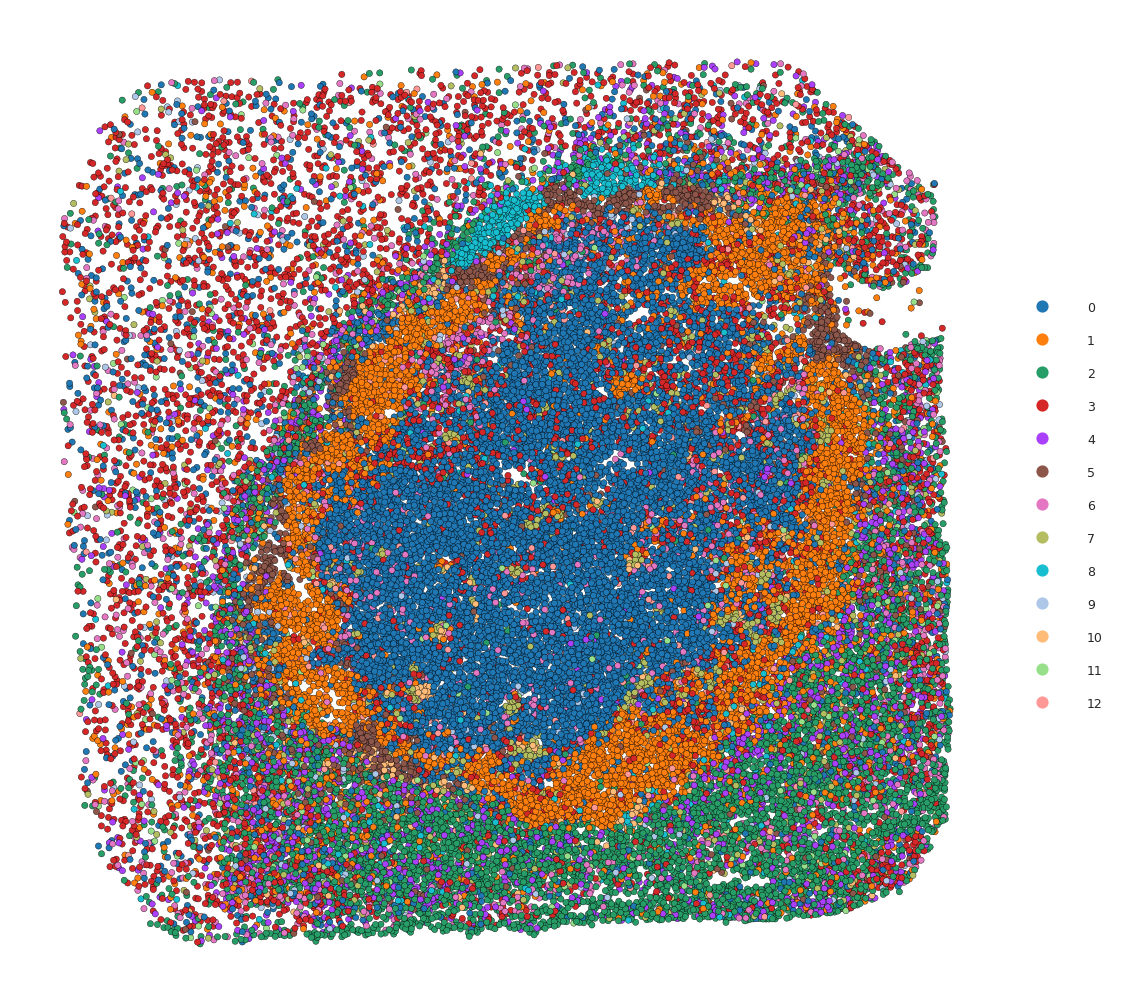

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

In [8]:
adata = filter_adata(adata)

In [9]:
adata

View of AnnData object with n_obs × n_vars = 16537 × 2000
    obs: 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'spatial'
    layers: 'raw_count'

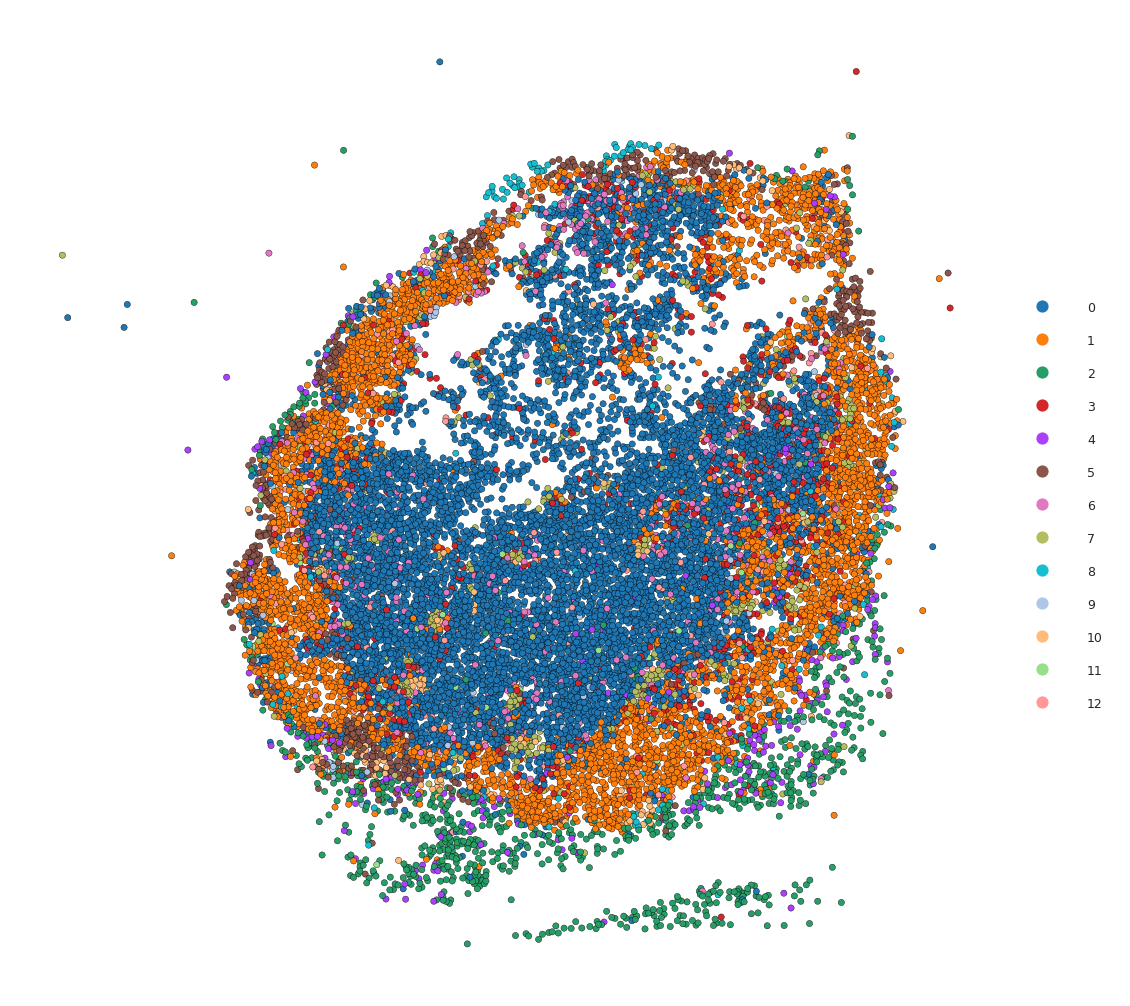

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

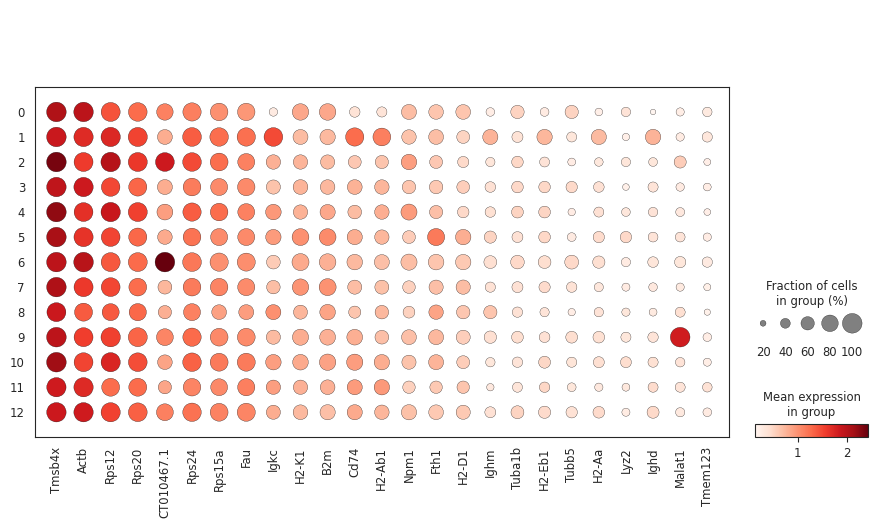

In [11]:
plt.rcParams["figure.figsize"] = (1, 1)
plt.rcParams['figure.dpi'] = 100
sc.pl.dotplot(adata, var_names=adata.var.means.sort_values(ascending=False)[:25].index, groupby='cluster')

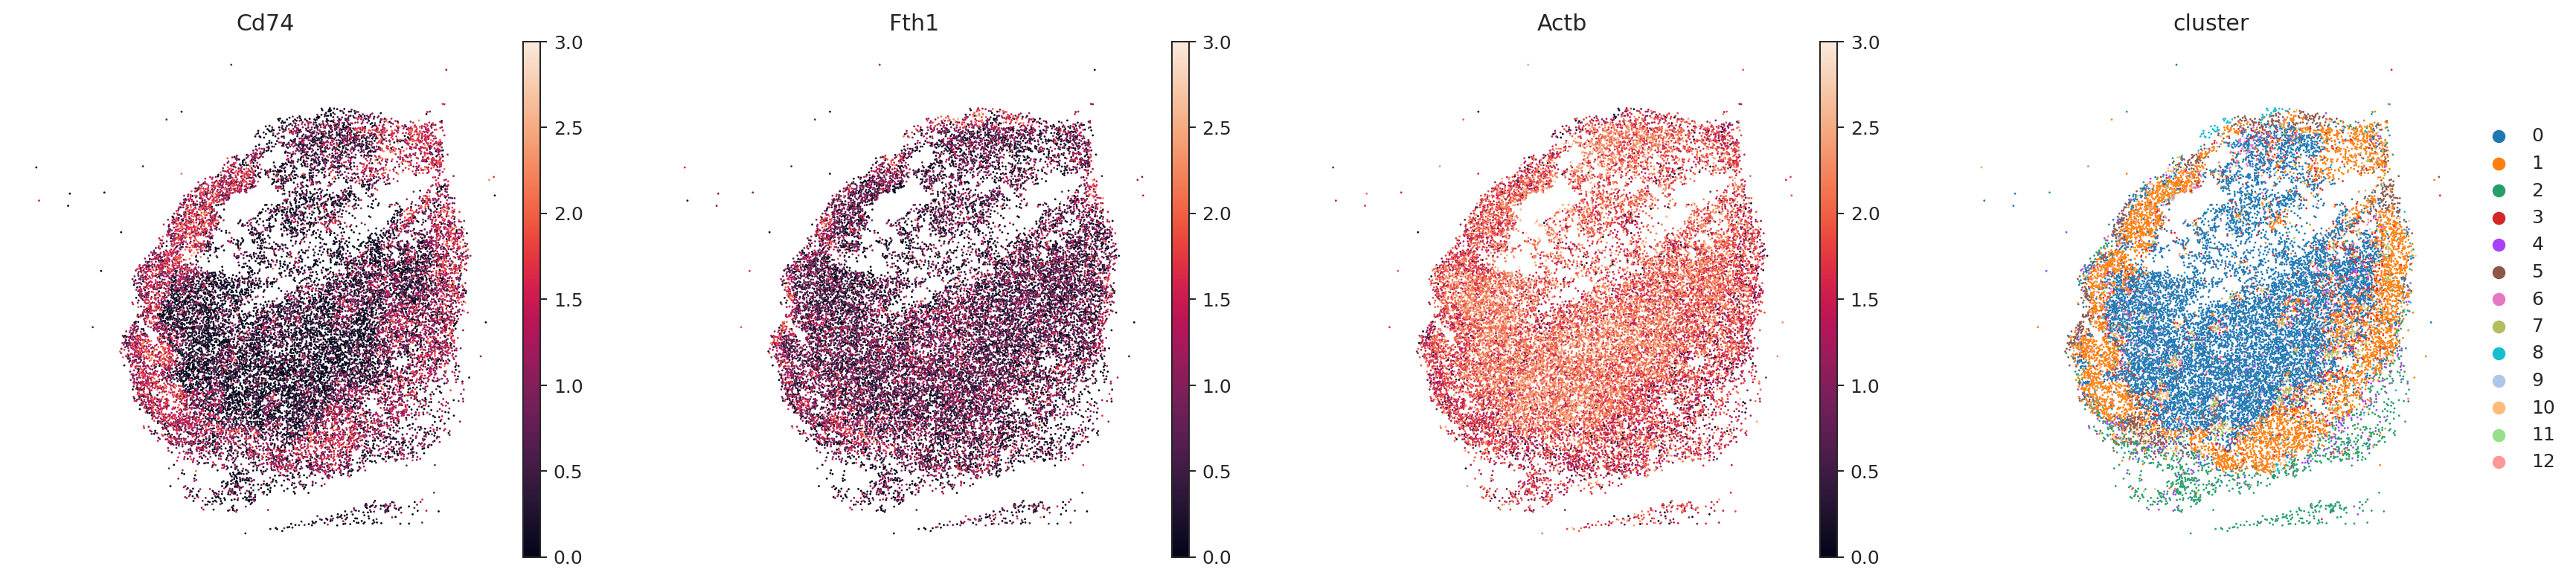

In [12]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color=['Cd74', 'Fth1', 'Actb', 'cluster'], 
                frameon=False, basis="spatial", s=5, show=False, vmin=0, vmax=3)
plt.axis('off')
plt.show()

In [13]:
grn = GeneRegulatoryNetwork()

In [14]:
regulators = grn.get_regulators(adata, target_gene='Cd74')

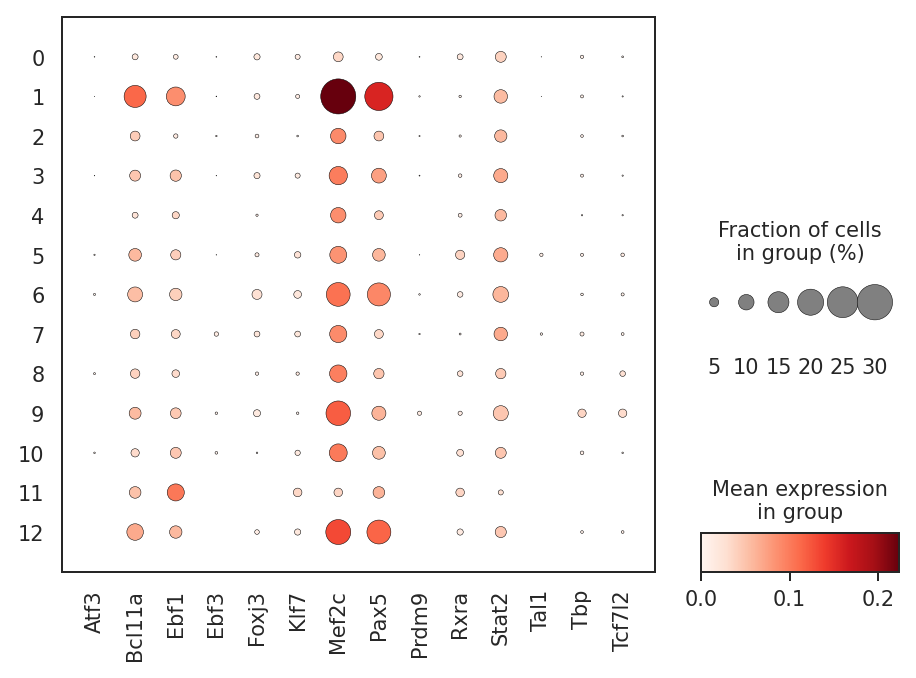

In [15]:
%matplotlib inline
sc.pl.dotplot(adata, var_names=regulators, groupby='cluster', figsize=(6, 4))

In [16]:
from spaceoracle.models.estimators import GeoCNNEstimator

In [17]:
estimator = GeoCNNEstimator()

In [18]:
X = adata.to_df()[regulators]
X

Atf3  Bcl11a  Ebf1  Ebf3     Foxj3  Klf7  Mef2c      Pax5  \
AAAAAACGTGCGCC   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
AAAAACCGTCAGAC   0.0     0.0   0.0   0.0  0.970512   0.0    0.0  0.000000   
AAAAACGCTCCGAC   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
AAAAACTGTAAAAG   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
AAAAAGCACGTGTT   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.935496   
...              ...     ...   ...   ...       ...   ...    ...       ...   
TTTTTTCGCGGCTA   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
TTTTTTGGGCTGGT   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
TTTTTTGTACGATT   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
TTTTTTGTTTTCTA   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   
TTTTTTTTGCTTTA   0.0     0.0   0.0   0.0  0.000000   0.0    0.0  0.000000   

                Prdm9  Rxra     Stat2  Tal1  Tbp  Tcf7l2  
AAAAAACGTGCGCC    0.0   0.0  0.000000   0.0  0.0     0.0  
AAAAACCGTCAGAC    0.0   0.0  0.000000   0.0  0.0     0.0  
AAAAACGCTCCGAC    0.0   0.0  0.000000   0.0  0.0     0.0  
AAAAACTGTAAAAG    0.0   0.0  0.000000   0.0  0.0     0.0  
AAAAAGCACGTGTT    0.0   0.0  0.000000   0.0  0.0     0.0  
...               ...   ...       ...   ...  ...     ...  
TTTTTTCGCGGCTA    0.0   0.0  0.000000   0.0  0.0     0.0  
TTTTTTGGGCTGGT    0.0   0.0  0.338013   0.0  0.0     0.0  
TTTTTTGTACGATT    0.0   0.0  0.000000   0.0  0.0     0.0  
TTTTTTGTTTTCTA    0.0   0.0  0.360003   0.0  0.0     0.0  
TTTTTTTTGCTTTA    0.0   0.0  0.000000   0.0  0.0     0.0  

[16537 rows x 14 columns]

In [19]:
y = adata.to_df()[['Cd74']]
y

Cd74
AAAAAACGTGCGCC  0.000000
AAAAACCGTCAGAC  0.970512
AAAAACGCTCCGAC  0.994831
AAAAACTGTAAAAG  0.000000
AAAAAGCACGTGTT  0.935496
...                  ...
TTTTTTCGCGGCTA  0.000000
TTTTTTGGGCTGGT  0.000000
TTTTTTGTACGATT  1.632737
TTTTTTGTTTTCTA  0.624154
TTTTTTTTGCTTTA  0.972337

[16537 rows x 1 columns]

In [25]:
xy = adata.obsm['spatial']
xy

ArrayView([[-3039.7,  2691.2],
           [-2480. ,  1516.6],
           [-2764.1,  1255.7],
           ...,
           [-2052.1,  2937.7],
           [-2025.5,  2342.3],
           [-4295.6,  2514.8]])

In [26]:
estimator.fit(X.values, y.values, xy, init_betas='ones', max_epochs=3)

100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


In [31]:
betas = estimator.get_betas(X[:1000].values, xy[:1000])

In [33]:
betas.shape, len(regulators)

((1000, 16), 14)